In [1]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

from Codebase.DQN import DQN
from Codebase.EpsilonGreedyPolicy import EpsilonGreedyPolicy
from Codebase.ReplayMemory import ReplayMemory
from Codebase.train import run_episodes, train

import gym
cartpole_env = gym.envs.make("CartPole-v1")
acrobot_env = gym.envs.make("Acrobot-v1")


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


E:\anaconda3\envs\rl2020\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
# Let's run it!
num_episodes = 500
batch_size = 64
discount_factor = 0.9
learn_rate = 1e-3
memory = ReplayMemory(10000)

# env = cartpole_env
env = acrobot_env

input_size = 6
output_size = 2

num_hidden = 128
seed = 42  # This is not randomly chosen


# We will seed the algorithm (before initializing QNetwork!) for reproducibility
random.seed(seed)
torch.manual_seed(seed)
env.seed(seed)

Q_net = DQN(num_hidden, input_size, output_size)
policy = EpsilonGreedyPolicy(Q_net, 0.05)
episode_durations = run_episodes(train, Q_net, policy, memory, env, num_episodes, batch_size, discount_factor, learn_rate)

 Episode 0 finished after 500 steps
 Episode 10 finished after 500 steps
 Episode 20 finished after 500 steps
 Episode 30 finished after 500 steps
 Episode 40 finished after 500 steps
 Episode 50 finished after 500 steps
 Episode 60 finished after 500 steps
 Episode 70 finished after 500 steps
 Episode 80 finished after 368 steps
 Episode 90 finished after 304 steps
 Episode 100 finished after 273 steps
 Episode 110 finished after 497 steps
 Episode 120 finished after 500 steps
 Episode 130 finished after 500 steps
 Episode 140 finished after 458 steps
 Episode 150 finished after 220 steps
 Episode 160 finished after 434 steps
 Episode 170 finished after 500 steps
 Episode 180 finished after 500 steps
 Episode 190 finished after 500 steps
 Episode 200 finished after 500 steps
 Episode 210 finished after 437 steps
 Episode 220 finished after 500 steps
 Episode 230 finished after 500 steps
 Episode 240 finished after 500 steps
 Episode 250 finished after 476 steps
 Episode 260 finished a

Text(0.5, 1.0, 'Episode durations per episode')

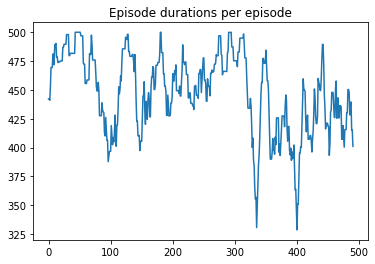

In [3]:
# And see the results
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.plot(smooth(episode_durations, 10))
plt.title('Episode durations per episode')